In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from emoji import demojize
import logging
logging.basicConfig(level=logging.ERROR)
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, message="The parameter 'token_pattern' will not be used since 'tokenizer' is not None")


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df = pd.read_excel('/kaggle/input/ttttttt/train_data.xlsx', sheet_name='Sheet1')
df = df.rename(columns={df.columns[0]: 'text', df.columns[1]: 'emotion'})
data = df[['text', 'emotion']]

def average_sentence_length(text):
    sentences = text.split('.')
    sentences = [s for s in sentences if s]
    num_sentences = len(sentences)
    num_words = sum(len(sentence.split()) for sentence in sentences)
    return num_words / num_sentences if num_sentences > 0 else 0

def average_word_length(text):
    words = text.split()
    num_words = len(words)
    num_chars = sum(len(word) for word in words)
    return num_chars / num_words if num_words > 0 else 0

data['avg_sentence_length'] = data['text'].apply(average_sentence_length)
data['avg_word_length'] = data['text'].apply(average_word_length)

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    tokens = word_tokenize(text)
    
    stopwords = set(["که", "و", "از", "به", "با", "برای", "در", "نه"])
    tokens = [token for token in tokens if token not in stopwords]
    
    return ' '.join(tokens)

data['processed_text'] = data['text'].apply(preprocess_text)

sentiment_lexicon = {
    'خوب': 1,
    'عالی': 2,
    'بد': -1,
    'افتضاح': -2
}

def sentiment_score(text):
    tokens = word_tokenize(text)
    return sum(sentiment_lexicon.get(token, 0) for token in tokens)

data['sentiment_score'] = data['text'].apply(sentiment_score)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['emotion'])


In [22]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_text'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=RANDOM_SEED)


In [29]:
data.columns

Index(['text', 'emotion', 'avg_sentence_length', 'avg_word_length',
       'processed_text', 'sentiment_score'],
      dtype='object')

In [34]:
data['processed_text']

0       عکسی چند روز پیش گذاشته بودم این فیلم الانشه و...
1       تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی همه ...
2                  خوبه تمام قسمتهای گوشی رو محافظت میکنه
3          این خاک مال مردمان است حاکمان ایران مهسا_امینی
4                    اگه تو بغلت بودم حالم خیلی بهتر میشد
                              ...                        
4918            من بو ماندگاریش راضی بودم قیمتش هم مناسبه
4919    گاز نداریم آب نداریم برق نداریم نت نداریم پول ...
4920    یکی بهم گفت برنو چرا عاشق نمیشی گفتم ما پول عا...
4921    زیادی داریم قضیه ی گاز میپردازیم فقط فراخوان ۲...
4922    سلام خیلی مواظبت کنید این ویروس کوفتی رو نگیری...
Name: processed_text, Length: 4923, dtype: object

[CV] END model__C=0.1, model__penalty=l2, model__solver=newton-cg; total time=   1.8s
[CV] END model__C=0.1, model__penalty=l2, model__solver=lbfgs; total time=   1.6s
[CV] END model__C=0.1, model__penalty=l2, model__solver=liblinear; total time=   1.2s
[CV] END model__C=1, model__penalty=l2, model__solver=newton-cg; total time=   1.5s
[CV] END model__C=1, model__penalty=l2, model__solver=newton-cg; total time=   1.5s
[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   1.7s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=   1.3s
[CV] END model__C=10, model__penalty=l2, model__solver=newton-cg; total time=   1.5s
[CV] END model__C=10, model__penalty=l2, model__solver=lbfgs; total time=   1.9s
[CV] END model__C=10, model__penalty=l2, model__solver=lbfgs; total time=   1.9s
[CV] END model__C=10, model__penalty=l2, model__solver=liblinear; total time=   1.3s
[CV] END model__C=100, model__penalty=l2, model__solver=newton-cg; total time=   

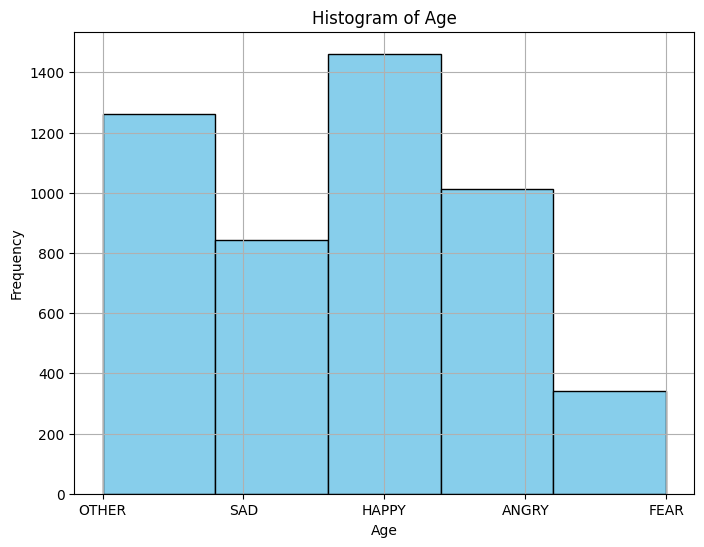

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(data['emotion'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
data.describe()

,avg_sentence_length,avg_word_length,sentiment_score
count,4923.000000,4923.000000,4923.000000
mean,9.880362,4.307004,0.091205
std,4.162262,1.079770,0.464079
min,1.000000,2.300000,-4.000000
25%,7.000000,3.705882,0.000000
50%,9.000000,4.111111,0.000000
75%,12.000000,4.615385,0.000000
max,23.000000,34.000000,8.000000


In [23]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Evaluate each classifier using cross-validation
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classifier Report:\n")
    print(classification_report(y_test, y_pred))



Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.41      0.39      0.40       185
           1       0.43      0.45      0.44        66
           2       0.74      0.68      0.71       306
           3       0.44      0.51      0.47       267
           4       0.37      0.34      0.36       161

    accuracy                           0.51       985
   macro avg       0.48      0.48      0.48       985
weighted avg       0.52      0.51      0.51       985


Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       0.58      0.48      0.53       185
           1       0.59      0.45      0.51        66
           2       0.80      0.76      0.78       306
           3       0.48      0.65      0.55       267
           4       0.50      0.40      0.44       161

    accuracy                           0.60       985
   macro avg       0.59      0.55      0.56       985
weighte

In [26]:
model = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=word_tokenize, max_features=1000)),
    ('model', model)
])

param_grid = {
    'model__C': [0.1, 1, 10, 100],  # Regularization strength
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solver to use
    'model__penalty': ['l2'],  # Norm used in penalization
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(data['processed_text'], y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extr

Best parameters found:  {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best accuracy:  0.5906958028971152


In [27]:
test_df = pd.read_csv('/kaggle/input/tttttttttttt/3rdHW_test.csv', header=None, names=['X'])

test_df['processed_text'] = test_df['X'].apply(preprocess_text)
test_df['avg_sentence_length'] = test_df['X'].apply(average_sentence_length)
test_df['avg_word_length'] = test_df['X'].apply(average_word_length)
test_df['sentiment_score'] = test_df['X'].apply(sentiment_score)

X_test_tfidf = grid_search.best_estimator_.named_steps['tfidf'].transform(test_df['processed_text'])

y_test_pred = grid_search.best_estimator_.named_steps['model'].predict(X_test_tfidf)

test_df['Y'] = label_encoder.inverse_transform(y_test_pred)

final_df = test_df[['X', 'Y']]
final_df.to_csv('/kaggle/working/final_predictions.csv', index=False)

print("Predictions saved to final_predictions.csv")


Predictions saved to final_predictions.csv
